<div style="border:solid purple 2px; padding: 20px"> 

Привет Мария! 👋

Меня зовут Рустам Муртазин, и я буду делать ревью твоей работы. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Я не хочу указавать тебе на совершенные тобою ошибки, а хочу поделиться своим опытом и помочь тебе стать настоящим профессионалом и сделать проект еще лучше.

Обрати внимание в первую очередь на те, что помечаны <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). Также в проекте могут быть небольшие «лайфхаки» по Python, не относящиеся к проекту, их я выделил фиолетовым цветом)

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

---

В целом мне все понравилось: твоя работа выполнена на хорошем уровне с минимальными помарками. Также работа выглядит аккуратной и хорошо оформленной. Вижу, что тебе дается python, и инструментарий ML.

В твоей работе нет серьезных ошибок, поэтому проект может быть принят. Возвращаю его тебе чтобы дать возможность ознакомиться с моими комментариями, возможно ты решишь улучшить проект или у тебя появятся вопросы.

Жду твою работу на повторное ревью :)

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn import tree
from tqdm.notebook import trange, tqdm

In [4]:
np.random.seed(12345)

df = pd.read_csv('/datasets/users_behavior.csv')

pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Хоть с данными и все ок, первичный анализ важен для любого проекта! Вообще, хорошо бы иметь у себя в арсенале функцию, которая выдавала бы всю информацию о датафрейме, знакомила бы нас с ним. В нее можно включить все основные методы типа `head`, `info` и т.д.  Можно графики строить какие-нибудь... Из готового, я бы рекомендовал почитать про [pandas_profiling](https://habr.com/ru/company/ruvds/blog/451478/?)


<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
    
Использовала pandas_profiling, дополнила вывод.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Круто!

У нас данные о 3214 пользователях оператор мобильной связи «Мегалайн».

- 2229 пользуются тарифом `smart`, 985 пользуются тарифом `ultra`;
- Данные предобработаны, пропущенных значений, дубликатов нет;
- 4 численных столбца - `calls`, `minutes`, `messages`, `mb_used` и один категориальный - `is_ultra`;
- Между столбцами `calls` и `minutes` сильная корреляция, между остальными столбцами слабая.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Для проекта DS можно было дополнительно корреляции посчитать между столбцами. Известно, что сильно коррелирующие столбцы плохо влияют на модель


<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
    
pandas_profiling вывел корреляционные матрицы. Мне что-то надо делать с тем, что между столбцами `calls` и `minutes` сильная корреляция?
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Хорошо бы проверить метрики без одного из этих столбцов, сильно коррелирующие данные плохо влияют на качество

## Разбейте данные на выборки

Разобьем данные на обучающую, валидационную и тестовую выборки:
- 60% обучающая выборка
- 20% валидационная выборка
- 20% тестовая выборка

Для каждой создадим переменные для признаков и целевого признака.

In [5]:
# разделим сначала на обучающую и валидационную + тестовую
df_train, df_valid_test = train_test_split(df, test_size=0.4, stratify=df['is_ultra'])

# разделим валидационную + тестовую на валидационную и тестовую
df_valid, df_test = train_test_split(df_valid_test, test_size=0.5, stratify=df_valid_test['is_ultra'])

# создадим переменные для признаков и целевого признака
# признаки обучающей выборки
features_train = df_train.drop('is_ultra', axis=1)
target_train = df_train['is_ultra']

# признаки валидационной выборки
features_valid = df_valid.drop('is_ultra', axis=1)
target_valid = df_valid['is_ultra']

# признаки тестовой выборки
features_test = df_test.drop('is_ultra', axis=1)
target_test = df_test['is_ultra']

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Круто, что ты фиксируешь `random_state`. Кстати, его можно задать один раз в начале проекта, например, используя любимый нами [numpy](https://pyprog.pro/random_sampling_functions/seed.html?)


<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
    
Задала np.random.seed(12345) в начале проекта. Но, чтобы воспроизвести результат в ячейке, надо run all сделать. А если я выполняю только одну ячейку, то уже другой результат. И я не понимаю, у меня accuracy выросло из-за того, что я поменяла перебор параметров или случайно.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Суть в том, что если ты задашь seed один раз в начале проекта, как я писал, то каждый раз, результат будет одинаковым. А качество выросло случайно, из-за того что выборки получились другими

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

На будущее, обрати внимание на аргумент `stratify` функции `train_test_split`. Стратификация особенно важна, когда у нас мало данных и возможен дисбаланс классов в обучении / валидации / тесте.


<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
    
Добавила аргумент `stratify`, accuracy увеличилась для всех моделей.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Отличная работа!

## Исследуйте модели

Сравним модели дерева решений, случайного леса и логистической регрессии. Оценивать качество модели будем с помощью метрики качества accuracy (доля правильных ответов) на валидационной выборке.

### Дерево решений

Подставим разные значения в параметр `max_depth` - глубина дерева.

In [6]:
best_model_tree = None
best_accuracy_tree = 0
best_depth_tree = 0

for depth in range(1, 15):
    model_tree = DecisionTreeClassifier(max_depth=depth)
    model_tree.fit(features_train, target_train)
    predictions_valid_tree = model_tree.predict(features_valid)
    accuracy_tree = accuracy_score(target_valid, predictions_valid_tree)
    
    if accuracy_tree > best_accuracy_tree:
        best_model_tree = model_tree
        best_accuracy_tree = accuracy_tree
        best_depth_tree = depth

print("\nAccuracy наилучшей модели дерева решений на валидационной выборке:", best_accuracy_tree, "Максимальная глубина:", best_depth_tree)


Accuracy наилучшей модели дерева решений на валидационной выборке: 0.7993779160186625 Максимальная глубина: 10


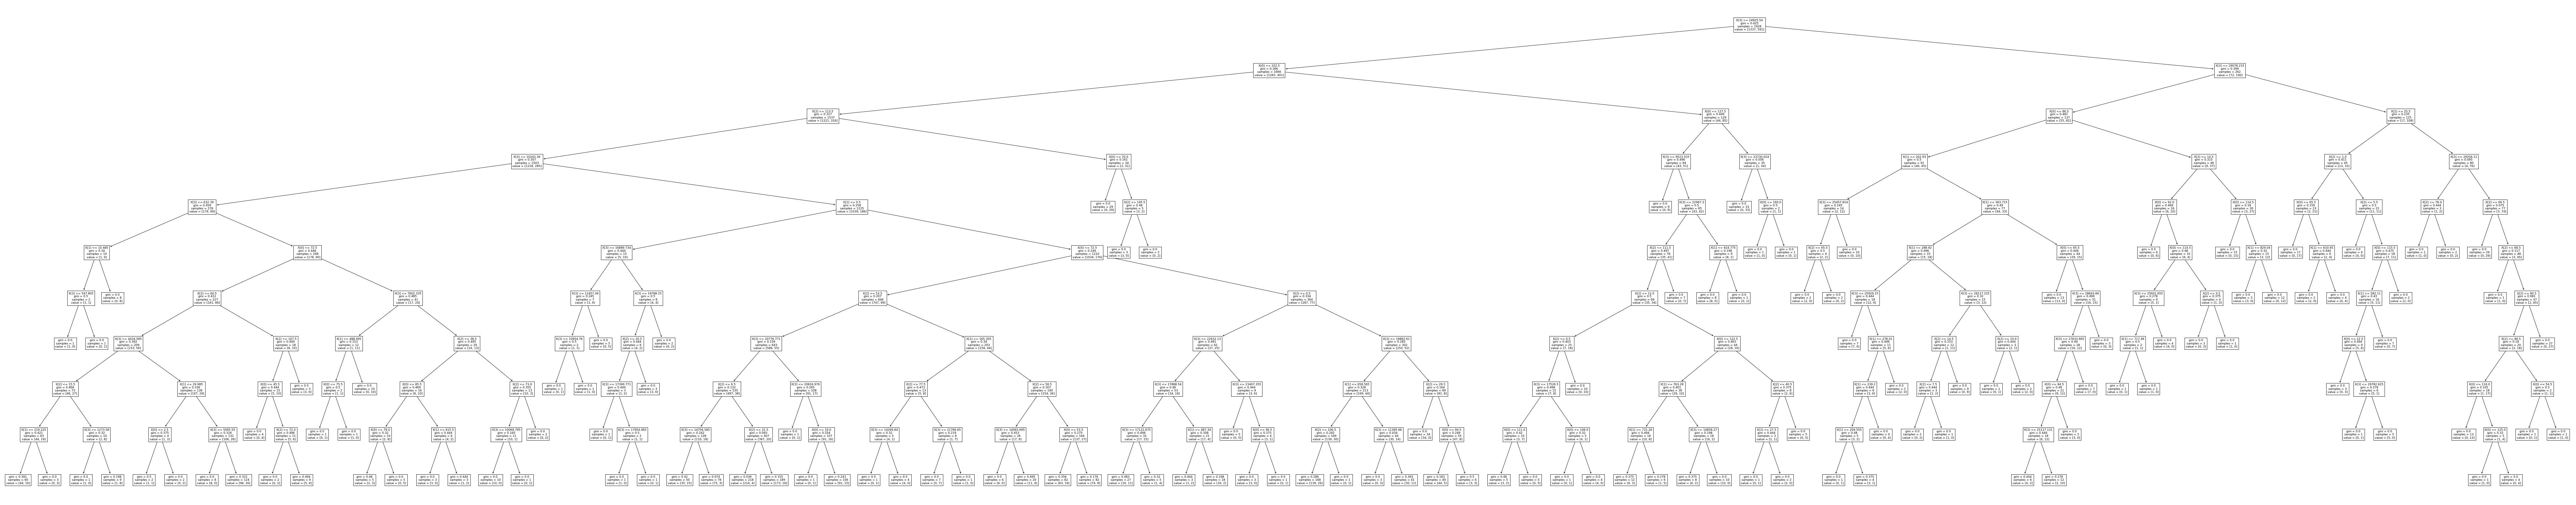

In [7]:
# посмотреть на логику решения дерева
fig, ax = plt.subplots(figsize=(150, 30))
tree.plot_tree(best_model_tree)
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Можно посмотреть на логику решения нашего дерева. Вот как это сделать
    
![](https://i.ibb.co/cDxjDWk/image.png)


<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>

Добавила.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

В твоем случае это не совсем информативно конечно...

### Случайный лес

Подставим разные значения в параметры `n_estimators` - число деревьев, `max_depth` - глубина дерева.

In [8]:
best_model_forest = None
best_accuracy_forest = 0
best_est_forest = 0
best_depth_forest = 0

for est in trange(1, 50):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        predictions_valid_forest = model_forest.predict(features_valid)
        
        accuracy_forest = model_forest.score(features_valid, target_valid)
        if accuracy_forest > best_accuracy_forest:
            best_model_forest = model_forest
            best_accuracy_forest = accuracy_forest
            best_est_forest = est
            best_depth_forest = depth
            
print("Accuracy наилучшей модели случайного леса на валидационной выборке:", best_accuracy_forest, "Количество деревьев:", best_est_forest, "Максимальная глубина:", best_depth_forest)

  0%|          | 0/49 [00:00<?, ?it/s]

Accuracy наилучшей модели случайного леса на валидационной выборке: 0.8304821150855366 Количество деревьев: 18 Максимальная глубина: 8


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Подобрать несколько параметров - очень правильное решение. Обычно, на практике, используют не циклы, а, например `GridSearch` или `RandomSearch`. Про них почитать можно, например, вот [тут](https://medium.com/@jackstalfort/hyperparameter-tuning-using-grid-search-and-random-search-f8750a464b35). Из более продвинутых вариантов можно выделить библиотеку [hyperopt](https://hyperopt.github.io/hyperopt/) или библиотеку [optuna](https://optuna.org/#code_examples).

P.S нужно учесть, что в этих библиотеках зашита кроссвалидация


### Логистическая регрессия

Подставим разные значения в параметр `max_iter` - максимальное количество итераций обучения.

In [9]:
best_model_log_reg = None
best_accuracy_log_reg = 0
best_max_iter = 0

for iter in (100, 1000, 10000):
    model_log_reg = LogisticRegression(solver='lbfgs', max_iter=iter)
    model_log_reg.fit(features_train, target_train)
    predictions_valid_log_reg = model_log_reg.predict(features_valid)
    accuracy_log_reg = model_log_reg.score(features_valid, target_valid)
    
    if accuracy_log_reg > best_accuracy_log_reg:
        best_model_log_reg = model_log_reg
        best_accuracy_log_reg = accuracy_log_reg
        best_max_iter = iter
    print("iter:", iter, "accuracy:", accuracy_log_reg)
            
print("Accuracy наилучшей модели логистической регрессии на валидационной выборке:", best_accuracy_log_reg, "Количество итераций:", best_max_iter)

iter: 100 accuracy: 0.7309486780715396
iter: 1000 accuracy: 0.7309486780715396
iter: 10000 accuracy: 0.7309486780715396
Accuracy наилучшей модели логистической регрессии на валидационной выборке: 0.7309486780715396 Количество итераций: 100


<div class="alert alert-success"> 
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Круто, что ты и здесь решила подобрать гиперпараметры. Хотя по мне, `solver` или `penalty` более важные параметры, я бы их перебирал. А еще, повысить скор на линейных моделях помогает [нормирование данных](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

Вывод:

Больше всего доля правильных ответов у модели случайного леса с параметрами:
- `n_estimators` = 18 (количество деревьев);
- `max_depth` = 8 (максимальная глубина дерева).

## Проверьте модель на тестовой выборке

Отдельные обучающие и валидационная выборки были нужны для подбора гиперпараметров. Теперь, чтобы улучшить результаты, обучим модель обучающей + валидационной выборке.

In [10]:
features_train_valid = pd.concat([features_train, features_valid], ignore_index=True)
target_train_valid = pd.concat([target_train, target_valid], ignore_index=True)

model_forest_test = RandomForestClassifier(n_estimators=best_est_forest, max_depth=best_depth_forest)
model_forest_test.fit(features_train_valid, target_train_valid)
predictions_forest_test = model_forest_test.predict(features_test)
accuracy_forest_test = model_forest_test.score(features_test, target_test)

print("Accuracy наилучшей модели случайного леса на тестовой выборке:", accuracy_forest_test)

Accuracy наилучшей модели случайного леса на тестовой выборке: 0.8273716951788491


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Когда гиперпараметры подобраны и валидационная выборка нам уже не нужна, мы можем обучить модель на бОльшей выборке (обучающая + валидационная), это позволит улучшить результаты на тестовой выборке


<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>

Сделала, обучила модель на обучающей + валидационной выборке.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Супер!

Обучим на валидационной + обучающей выборке и проверим на тестовой остальные модели.

In [11]:
# дерево решений
model_tree_test = DecisionTreeClassifier(max_depth=best_depth_tree)
model_tree_test.fit(features_train_valid, target_train_valid)
predictions_tree_test = model_tree_test.predict(features_test)
accuracy_tree_test = model_tree_test.score(features_test, target_test)

print("Accuracy наилучшей модели дерева решений на тестовой выборке:", accuracy_tree_test)

# логистическая регрессия
model_log_reg_test = LogisticRegression(solver='lbfgs', max_iter=best_max_iter)
model_log_reg_test.fit(features_train_valid, target_train_valid)
predictions_log_reg_test = model_log_reg_test.predict(features_test)
accuracy_log_reg_test = model_log_reg_test.score(features_test, target_test)

print("Accuracy наилучшей модели логистической регрессии на тестовой выборке:", accuracy_log_reg_test)

Accuracy наилучшей модели дерева решений на тестовой выборке: 0.807153965785381
Accuracy наилучшей модели логистической регрессии на тестовой выборке: 0.7558320373250389


На тестовой выборке доля правильных ответов ниже у всех моделей, но у случайного леса по-прежнему больше всех.

Вывод: наибольшее значение accuracy у модели случайного леса - 0.827.

<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Индикаторы состояния: progress и tqdm <a class="tocSkip"> </h3>

Как перестать беспокоиться о том, не завис ли скрипт? Вы можете создавать свои индикаторы состояния. Это весьма увлекательное занятие. Но делать то же самое с [progress](https://pypi.org/project/progress/) или [tqdm](https://pypi.org/project/tqdm/) куда быстрее и надежнее.

Обычно я использую эти две библиотеки, но вот [здесь](https://habr.com/ru/post/483400/) ты можешь почитать про альтернативные варианты

![](https://i.ibb.co/B4SDm8Y/68747470733a2f2f7261772e6769746875622e636f6d2f7665726967616b2f70726f67726573732f6d61737465722f64656d.gif)

<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
    
Спасибо, использовала в долгом цикле подбора параметров RandomForestClassifier. 
</div>

## (бонус) Проверьте модели на адекватность

В файле с данными из 321 клиентов 2229 пользуются тарифом `smart` (69%) и 985 пользуются тарифом `ultra` (31%). Сравним нашу модель со случайной.

Если бы случайная модель всегда предсказывала больший класс (тариф `smart`), ее доля правильных ответов:  

<br>
$$ accuracy = \frac{(количество\;пользователей\;smart)\;*\;(доля\;угаданных\;smart)\;+\;(количество\;пользователей\;ultra)\;*\;(доля\;угаданных\;ultra)}{количество\;пользователей} $$  
<br>

- Количество пользователей smart = количество пользователей * 0.69
- Количество пользователей ultra = количество пользователей * 0.31
- Доля угаданных ответов для пользователей smart = 1
- Доля угаданных ответов для пользователей ultra = 0

<br>
<br>
$$ accuracy = \frac{0.69\;*\;количество\;пользователей\;*\;1\;+\;0.31\;*\;количество\;пользователей\;*\;0}{количество\;пользователей} = 0.69 $$

<br>
<br>
У нашей модели случайного леса accuracy = 0.827 на тестовой выборке. Наша модель лучше случайной.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Да, круто. Проверить на корректность можно еще с помощью `Confusion matrix / Матрица ошибок` или `ROC curve / ROC-анализ`. Лично мне больше всего нравится (и я чаще его использую) последний вариант

<div class = "alert alert-info" style="border-left: 7px solid blue">
<h3>Комментарий студента</h3>
    
Спасибо за рекомендации! Что не выполнила, будет в теории следующего спринта, там разберу :)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Спасибо тебе, за классный проект! Надеюсь ты учтешь мои комментарии в последующих работах. Благодарю за старания и интерес и желаю успехов в дальнейших проектах 😊

</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
